# Finding the right markets to advertise in
In this project we'll put ourselves into the shoes of an e-learning company offering courses on programming, and we're tasked in finding the best markets to advertise in.

Finding sources:
We have chosen to use a ready survey collection made on FreeCodeCap, whose audience matches perfectly ours (and also because the data is free) This will allow us to get a much quicker grasp over the market and understand better the profiles of coders, whether professionals or wannabe. 

**Source**: [Github - Freecodecamp](https://github.com/freeCodeCamp/2017-new-coder-survey/tree/master/clean-data)


In [1]:
import pandas as pd

file = pd.read_csv("2017-fCC-New-Coders-Survey-Data.csv", low_memory = False)

file.shape

(18175, 136)

In [2]:
pd.options.display.max_seq_items = 100 #longer width of printed stuff
pd.options.display.max_columns = 500

file.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

The more descriptive columns are those who'll help us outline a good profile can be identified in the following ones:
- ```CountryLive``` (knowing the market)
- ```JobRoleInterest```
- ```JobInterest``` (all the columns)
- ```MoneyForLearing```  

And potentially a handful of others.

In [3]:
file.columns

Index(['Age', 'AttendedBootcamp', 'BootcampFinish', 'BootcampLoanYesNo',
       'BootcampName', 'BootcampRecommend', 'ChildrenNumber', 'CityPopulation',
       'CodeEventConferences', 'CodeEventDjangoGirls',
       ...
       'YouTubeFCC', 'YouTubeFunFunFunction', 'YouTubeGoogleDev',
       'YouTubeLearnCode', 'YouTubeLevelUpTuts', 'YouTubeMIT',
       'YouTubeMozillaHacks', 'YouTubeOther', 'YouTubeSimplilearn',
       'YouTubeTheNewBoston'],
      dtype='object', length=136)

## 1. Job Role Interest
We can find out in the jobroleinterest a long list of options in which people are interested. This helps us understand if preferences are very clear or sparse - in the latter case, how sparse they are?

At long range, you can use this info to understand if this sample is representative for our target population (The whole market of learning developers, with a special focus on Web and Mobile development).

In [4]:
# Frequency distribution table for 'JobRoleInterest'
(file['JobRoleInterest'].value_counts(normalize = True) * 100).head(15)

Full-Stack Web Developer                                                       11.770595
  Front-End Web Developer                                                       6.435927
  Data Scientist                                                                2.173913
Back-End Web Developer                                                          2.030892
  Mobile Developer                                                              1.673341
Game Developer                                                                  1.630435
Information Security                                                            1.315789
Full-Stack Web Developer,   Front-End Web Developer                             0.915332
  Front-End Web Developer, Full-Stack Web Developer                             0.800915
  Product Manager                                                               0.786613
Data Engineer                                                                   0.758009
  User Experience Des

We could appreciate how the top 2 clear interests stay into the Full Stack / frontend Web development category as standalones. However, it should be noted that these interest are flagged (as part of multiple option answers) into many other entries.
For this reason we'll try to better understand:  

1) **How sparse is the interest across categories**: how many people have select 1,2,[...], n subjects?  
2) **Distribution of votes per category** : how many votes were placed for each category? (using the "JobInterest" columns). This will obviously exceed the total headcount.

### Width of interests in the sample

In [5]:
file["JobRoleInterest"].head()

0                                                  NaN
1                             Full-Stack Web Developer
2      Front-End Web Developer, Back-End Web Develo...
3      Front-End Web Developer, Full-Stack Web Deve...
4    Full-Stack Web Developer, Information Security...
Name: JobRoleInterest, dtype: object

In [6]:
#Draw a frequency table of the JobRoleInterest series and put it into a dataframe
freq_t = file['JobRoleInterest'].value_counts()
temp_df = pd.DataFrame(freq_t).reset_index()

#declare a function that will split string content by , and return list length
def split_and_count(x):
    splitted = x.split(',') #split method returns a list
    return len(splitted)

temp_df["number_of_interests"] = temp_df["index"].apply(split_and_count)


#Aggregate data into a pivot and calculate % of total
pt = temp_df.pivot_table(values = "JobRoleInterest", index = "number_of_interests", aggfunc = 'sum')

pt['% of total'] = (pt['JobRoleInterest'] / sum(pt['JobRoleInterest']))

pt

,JobRoleInterest,% of total
number_of_interests,,
1,2213,0.316505
2,761,0.108839
3,1111,0.158896
4,1064,0.152174
5,842,0.120423
6,470,0.067220
7,270,0.038616
8,123,0.017592
9,69,0.009868


(0, 2500)

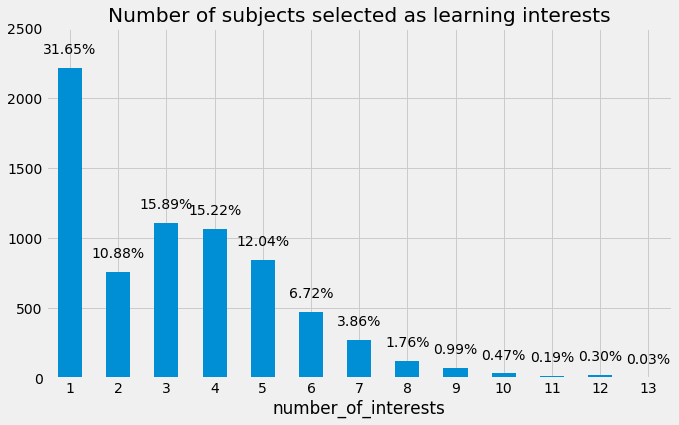

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')


plt.figure(figsize = (10,6))
pt["JobRoleInterest"].plot.bar()

#prepare annotation data
y = pt["JobRoleInterest"]
label = pt["% of total"].map("{:.2%}".format)

for i in range(0,13):
    plt.annotate(label.iloc[i],
                 xy = (i,y.iloc[i] + 100),
                 ha = 'center'
                )

plt.xticks(rotation = 0)
plt.title('Number of subjects selected as learning interests')
plt.ylim(0,2500)


In [8]:
#The above could have been condensed with
#import seaborn as sns
#sb = file["JobRoleInterest"].dropna().apply(split_and_count)
#sns.countplot(x = sb.index, data = test)

### Most interesting subjects
We are now going to check which subjects are the one with most demand and votes.  
This will help us understand whether we are looking at a sample representative of our target population, that is, developers wishing to study and learn, with a special focus on mobile and web development. The sample will be representative assuming that a good majority of it has people interested in those branches of web development.
We can do this by analyzing two columns:
- `JobRoleInterest` (same as now, filtering data on web development / mobile development)
- `JobInterest` (a more narrowed down category, splitting data into different columns)

(0, 1)

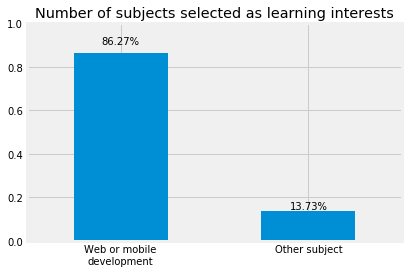

In [9]:
interest_nonulls = file["JobRoleInterest"].dropna().str.lower() #drop nulls and go lowercase
bf = interest_nonulls.str.contains('web developer|mobile developer')#no spaces! 'web_developer |' matches also the space

freq = bf.value_counts(normalize = True)
l = freq.map("{:.2%}".format)
#plot the frequency table of the true/False boolean array above
freq.plot.bar()

plt.xticks([0,1],['Web or mobile\ndevelopment', 'Other subject'], rotation = 0)


for i in range(0,2):
    plt.annotate(l.iloc[i],
                 xy = (i, freq.iloc[i]*1.05),
                 ha = 'center'
                )

    
plt.title('Number of subjects selected as learning interests')
plt.ylim(0,1)


It turns out we have a very high level of interest for web of mobile development as a whole, with a total of 86.7% mentions in the JobRoleInterest columns. Let's give a check also for the "JobInterest" set of columns.

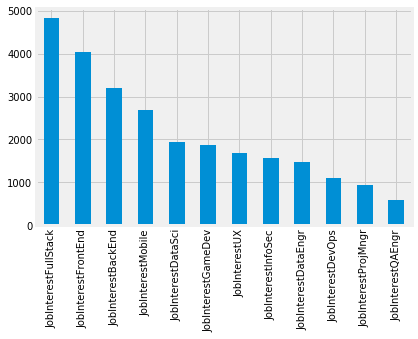

In [10]:
filter = file.columns.str.contains("JobInterest")
job_interest_cols = list(file.columns[filter])
job_interest_cols.remove('JobInterestOther') #it contains string values and will act as a residual

jobs = file[job_interest_cols].sum().sort_values(ascending = False)

jobs.plot.bar()


The plot displays clear interest in the branches of Fullstack, Front / backend and Mobile development.
In light of this we can easily put together these columns as representative for our sample. Let's plot them and understand the actual weight.

([<matplotlib.axis.XTick at 0x12403790>,
 <a list of 2 Text xticklabel objects>)

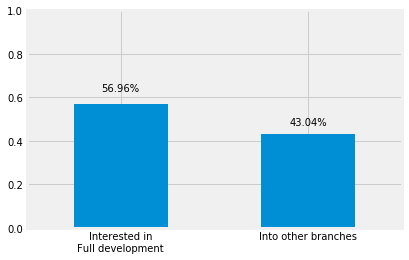

In [11]:
#calculate percentages
good = jobs[0:4].sum() / jobs.sum() 
potentials = jobs[4:].sum() / jobs.sum()

#put together into series and prep labels
jobinterest = pd.Series([good, potentials])
labels = jobinterest.map("{:.2%}".format)


#plot graph
jobinterest.plot.bar()

for i in enumerate(jobinterest):
    plt.annotate(labels[i[0]],
                 xy = (i[0], i[1]*1.1),
                 ha = 'center'
                ) 
plt.ylim(0,1)       
plt.xticks([0,1], ('Interested in\nFull development', 'Into other branches'), rotation = 0)


Despite not as strongly relevant as in the other case, even this column shows that a great deal of people (more than half actually) have career interests in web development in all its branches. 
The discrepancy in the two answers might lead us to think that, given the double nature (question + control question), we should nevertheless approach the whole thing with an extra degree of attention. 

Looking at the first of our analyzed questions, it was actually asked in a second phase of the survey, so might be stronger as a proofcheck.

    name": "JobRoleInterest",
    "title": "Job Role Interest from Second Part of the Survey",
    "description": "The question asked was "Which one of these careers are you interested in?" and this is a string of the multiple answers possibly given. This string comes from the second dataset. This column was kept in order to double check the other columns.",
    "type": "string

All in all, we are ok in considering this dataset as representative of our chosen market.


# Location of the markets

In [12]:
#keep a reduced version of the dataset, cutting out all the records that did not give a clear answer on "JobRoleInterest"
subset = file[file["JobRoleInterest"].notnull()]
subset.shape

(6992, 136)

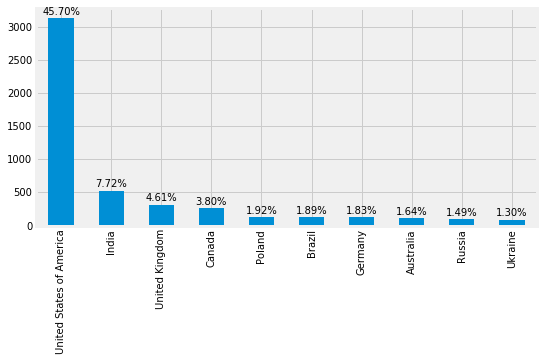

In [13]:
markets_perc = subset["CountryLive"].value_counts(normalize = True).map("{:.2%}".format)
markets_abs = subset["CountryLive"].value_counts()

fig = plt.figure(figsize=(8,4))

markets_abs[0:10].plot.bar()

for i in range(0,10):
    plt.annotate(markets_perc[i],
                xy = (i, markets_abs[i]+50), #you can use x = i as a positional argument
                ha = 'center'
                )

It's prettu evident from here that the biggest market BY FAR in terms of potential is the US. India places second with 7.72% of the sample, followed by UK and Canada.
We should factor in some further accuracy in the way that this data:  
- Tells us that the US market is better represented than the others.
- Does not consider the actualy # of people in each country. India shall be considered with extra care given the fact it has a population of 1.339 billions (!), whilst the UK is just 66 millions.
- We have no idea about the willingness to spend of these e-learners. We can hypotesize that a country such as India will have a lower willingness to pay compared to the US.


# 2. Finding areas with high willingness to spend

Given that our company has a $59 dollar plan fee, we need to match this price with the `MoneyForLearning` columns and adjust / confirm pricing. In light of this we will:
- Understand money spent for study
- Understand number of months used to study (and calculate learning budget / month)
- Limit our market analysis to the four biggest markets (also because of language: we teach in English).

In [14]:
subset.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,United States of America,United States of America,software development and IT,NaN,Employed for wages,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,25.0,14f1863afa9c7de488050b82eb3edd96,21ba173828fbe9e27ccebaf4d5166a55,13000.0,1.0,0.0,0.0,0.0,Within 7 to 12 months,1.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,work for a medium-sized company,1.0,"Front-End Web Developer, Back-End Web Develo...",no preference,Spanish,"single, never married",1000.0,5.0,2ed189768e,2017-03-09 00:37:58,2017-03-09 00:33:53,2017-03-09 00:40:14,2017-03-09 00:38:02,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,Codenewbie,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,high school diploma or equivalent (GED),NaN,NaN,

In [15]:
#Define a column "monthly_budget" by preparing the two building series
money = subset.loc[:,"MoneyForLearning"]
months = subset.loc[:,"MonthsProgramming"].apply(lambda x: x+1 if x == 0 else x) #apply lambda to avoid division by 0

subset["monthly_budget"] = money/months


c:\users\niccolo.longoni\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [16]:
filter_nulls = subset["CountryLive"].notna() & subset["monthly_budget"].notna()
new = subset[filter_nulls]

new.shape

(6212, 137)

Now we need to merge together the results of the `monthly_budget` column with the `CountryLive` columns, keeping only valid values in both columns, having a robust dataframe.

In [17]:
#group dataframe by Country and apply two functions to the "monthly_budget" columns
moneybycountry = new.groupby('CountryLive').agg({'monthly_budget': ['mean','median']})

markets = ['United States of America', 'United Kingdom', 'India','Canada']
moneybycountry.loc[markets]

monthly_budget          
                                   mean    median
CountryLive                                      
United States of America     227.997996  3.333333
United Kingdom                45.534443  0.000000
India                        135.100982  0.000000
Canada                       113.510961  0.000000

Data is a bit strange, for two considerations.  
- It is surprising to see that India has a mean propensity to spend for higher that UK and Canada.  
- India, UK and Canada have a median value of 0€ on the monthly budget, this suggests for a **very polarized distribution**, that can be clearly appreciated by taking a look to the density distribution.

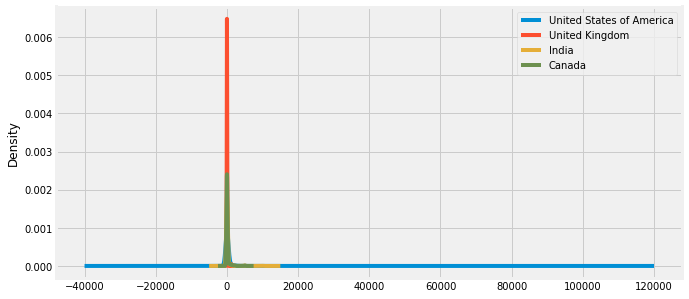

In [18]:
plt.figure(figsize = (10,5))

for i in markets:
    filter = new["CountryLive"] == i
    #select a filtered version of the dataframe, and isolate the monthly_budget columns
    new[filter]["monthly_budget"].plot.kde(
        #xlim = (-1000, 2000), 
        label = i)
    plt.legend()
    

# 3. Clearing distribution of monster outliers
In light of the above, we'll try to understand for each country:
- percentage of users that have a willingness to pay vs those that will accept only free learning
- understand the initial distribution of the monthly_budget parameter
- isolate the outliers from the top, if there are any.

In [19]:
## define a boolean filter for the markets we are interested in and shape a dataframe
market_filter = new["CountryLive"].isin(markets)
market_df = new[market_filter]

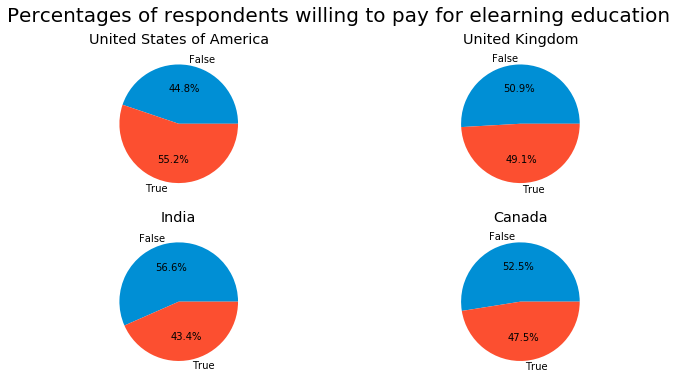

In [20]:
fig = plt.figure(figsize = (10,6))

for i in enumerate(markets):
    ax = fig.add_subplot(2,2,i[0]+1)
    #identify a dataframe subset for each country
    country = market_df[market_df["CountryLive"] == i[1]]
    
    #focus on the monthly_budget column and set a True/False flag if the value is > 0
    series = country["monthly_budget"].apply(lambda x:True if x > 0 else False)
    data = series.value_counts().sort_index()
    
    #Draw the actual graphs
    ax.pie(data, labels = data.index, autopct='%1.1f%%')
    ax.set_title(i[1])
    
    fig.suptitle("Percentages of respondents willing to pay for elearning education", fontsize = 20)

It looks like in all cases we will need to consider about 50% of the our dataset as for users that are actually willing to pay some money. This helps us in identifying our **true addressable market**, given the fact we are not considering yet the option of giving out free courses with a different business model.

Let's now take also a quick look to a stripplot of our markets. Do we have strong outliers?

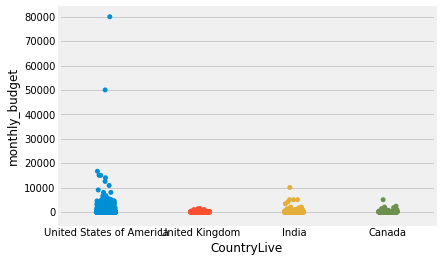

In [21]:
#Draw a set of boxplots to identify the distribution and clear off outliers
import seaborn as sns
sns.stripplot(x = "CountryLive", y = "monthly_budget", data = market_df, jitter = True)

It's pretty clear that some items are way off, and having 80k for learning each month is VERY unlikely to happen, as well in India people wishing to pay 5-10k are awkward choices.  
In light of this we will:  
- **redefine our source dataframe**, filtering out all the low-end users that do not wish to pay any money at all.
- Check the outliers of each country, removing them.  
- Finally put together a realistic picture of our target markets.

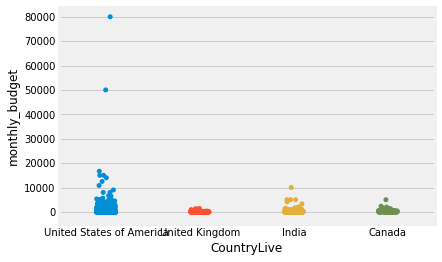

In [22]:
#redefine market df with only the paying users
market_df = market_df[market_df["monthly_budget"] > 0]

sns.stripplot(x = "CountryLive", y = "monthly_budget", data = market_df, jitter = True, order = markets)

In [23]:
#Create a qualified dictionary

repo = {}
keys = ['us','uk','in','ca']

for (k,v) in zip(keys, markets):
    #access a filtered dataframe
    df = market_df[market_df["CountryLive"] == v]
    #place it into repo dictionary
    repo[k] = df

## 3.1 Dealing with USA outliers
Let's start by removing the outliers >20k and re-evaluate the distribution and the mean values.

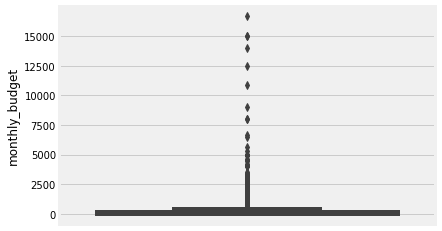

In [24]:
#Evaluate outliers on the monthly_budget column
filt = repo["us"]["monthly_budget"] < 20000

sns.boxplot(repo["us"][filt]["monthly_budget"], orient = 'vertical')

In [25]:
#Understand distribution in percentiles and evaluate how many observations we have over 7500
print(repo["us"]["monthly_budget"].describe())


print("\nNumber of observations above 7500$ -->",
    repo["us"][repo["us"]["monthly_budget"] > 7500]["monthly_budget"].count())


count     1619.000000
mean       413.043929
std       2597.175174
min          0.033333
25%         10.000000
50%         33.333333
75%        166.666667
max      80000.000000
Name: monthly_budget, dtype: float64

Number of observations above 7500$ --> 11


There are only 11 observations that score >7500 as a monthly budget for online learning.
By cutting them off we can reach a more representative picture of the US addressable market (those with a monthly budget > 0 and < 7500).  
By running a describe method, we can find out that the end result shows a **mean value of 267 dollars**.

In [26]:
#reassign repo["us"] removing the rows with the values considered as outliers.
to_drop = repo["us"][repo["us"]["monthly_budget"] > 7500].index
repo["us"] = repo["us"].drop(to_drop)


repo["us"]["monthly_budget"].describe()

count    1608.000000
mean      267.237638
std       691.719253
min         0.033333
25%        10.000000
50%        33.333333
75%       166.666667
max      6666.666667
Name: monthly_budget, dtype: float64

## 3.2 Dealing with India outliers


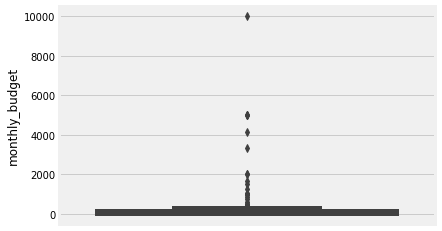

In [27]:
#Evaluate outliers on the monthly_budget column
filt = repo["in"]["monthly_budget"] <= 10000

sns.boxplot(repo["in"][filt]["monthly_budget"], orient = 'vertical')

In [28]:
#Understand distribution in percentiles and evaluate how many observations we have over 2000
print(repo["in"]["monthly_budget"].describe())


print("\nNumber of observations above 2000$ -->",
    repo["in"][repo["in"]["monthly_budget"] > 2000]["monthly_budget"].count())


count      201.000000
mean       311.202759
std       1026.728280
min          0.138889
25%          5.500000
50%         20.000000
75%        133.333333
max      10000.000000
Name: monthly_budget, dtype: float64

Number of observations above 2000$ --> 6


By taking a quick look at the outliers >2000 dollars of monthly budget in India, we can find out that these results are a bit off - it mihgt be because of bad compiling or because they have considered also money spent for education. Whatever the case, we are going to remove them and keep a less polarized version of the Indian market.

In [29]:
repo["in"][repo["in"]["monthly_budget"] > 2000]

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,monthly_budget
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,A stay-at-home parent or homemaker,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,30.0,d964ec629fd6d85a5bf27f7339f4fa6d,950a8cf9cef1ae6a15da470e572b1b7a,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,work for a startup,1.0,"User Experience Designer, Mobile Developer...",in an office with other developers,Bengali,"single, never married",20000.0,4.0,38d312a990,2017-03-10 10:22:34,2017-03-10 10:17:42,2017-03-10 10:24:38,2017-03-10 10:22:40,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,bachelor's degree,Computer Programming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,Not working and not looking for work,NaN,100000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,10.0,811bf953ef546460f5436fcf2baa532d,81e2a4cab0543e14746c4a20ffdae17c,NaN,0.0,0.0,0.0,NaN,I haven't decided,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,work for a multinational corporation,1.0,"Information Security, Full-Stack Web Developer...",no preference,Hindi,"single, never married",50000.0,15.0,4611a76b60,2017-03-10 10:48:31,2017-03-10 10:42:29,2017-03-10 10:51:37,2017-03-10 10:48:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,bachelor's degree,Computer Science,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN

In [30]:
#reassign repo["in"] removing the rows with the values considered as outliers.
to_drop = repo["in"][repo["in"]["monthly_budget"] > 2000].index
repo["in"] = repo["in"].drop(to_drop)

repo["in"]["monthly_budget"].describe()

count     195.000000
mean      154.111562
std       338.256033
min         0.138889
25%         5.196429
50%        20.000000
75%       122.500000
max      2000.000000
Name: monthly_budget, dtype: float64

## 3.3 Dealing with Canada outliers



count     114.000000
mean      238.970444
std       617.345854
min         0.416667
25%         8.333333
50%        25.000000
75%       131.250000
max      5000.000000
Name: monthly_budget, dtype: float64


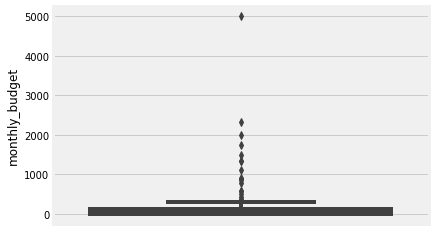

In [31]:
sns.boxplot(repo["ca"]["monthly_budget"], orient = 'vertical')

print(repo["ca"]["monthly_budget"].describe())

That 5k single outlier is way too off the board: let's see what it is about.

In [32]:
repo["ca"].loc[repo["ca"]["monthly_budget"] == 5000]

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,monthly_budget
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,30 to 44 minutes,Canada,Canada,finance,NaN,Employed for wages,NaN,60000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,1.0,0.0,0.0,250000.0,10.0,739b584aef0541450c1f713b82025181,28381a455ab25cc2a118d78af44d8749,140000.0,1.0,1.0,0.0,0.0,I haven't decided,1.0,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,work for a multinational corporation,NaN,"Mobile Developer, Full-Stack Web Developer, ...",from home,Yue (Cantonese) Chinese,"single, never married",10000.0,2.0,41c26f2932,2017-03-25 23:23:03,2017-03-25 23:20:33,2017-03-25 23:24:34,2017-03-25 23:23:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,bachelor's degree,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


From the data above we can see that the record has some curious details:  
- It's a 24y old Guy who has attended a bootcamp (so he might have pooled in the bootcamp costs these values)
- It states an income of 140k (which might sustain the financial effor of 5k per month), which is a bit too high or a 24y old, especially if the expected earning is 60k. He might have mistyped?

Whatever the case, we're going to drop him and check again the metrics of the distribution, to see how mean values have changed.

In [33]:
index_todrop = repo["ca"].loc[repo["ca"]["monthly_budget"] == 5000].index
repo["ca"] = repo["ca"].drop(index_todrop)


repo["ca"]["monthly_budget"].describe()


count     113.000000
mean      196.837439
std       424.664765
min         0.416667
25%         8.333333
50%        25.000000
75%       125.000000
max      2337.166667
Name: monthly_budget, dtype: float64

# 4. Re-joining data and business recommendations

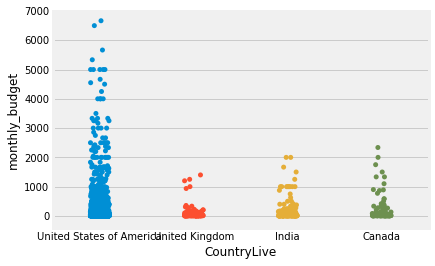

In [34]:
c = repo["us"].columns
final = pd.DataFrame(columns = c)

for df in repo.values(): 
    final = final.append(df)
    
final.shape

sns.stripplot(x = "CountryLive", y = "monthly_budget", data = final, jitter = True, order = markets)

The Strip plot above gives a visual representation of the distributions on the cleaned dataframe - MUCH better than what we had in the beginning, and also clean of outliers.   
Let's now understand the distrbutions, crossed with some descriptive statistics.

                         monthly_budget                 
                                   mean     median count
CountryLive                                             
Canada                       196.837439  25.000000   113
India                        154.111562  20.000000   195
United Kingdom                92.730727  20.833333   137
United States of America     267.237638  33.333333  1608


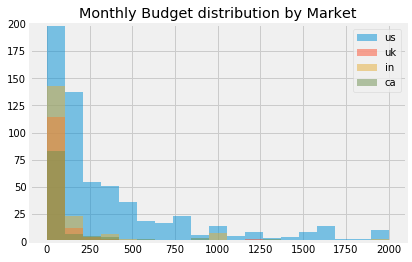

In [35]:
#group dataframe by Country and apply two functions to the "monthly_budget" columns
print(final.groupby('CountryLive').agg({'monthly_budget': ['mean','median','count']}))

#draw a visual support for the monhly bud
import numpy as np
for key,df in repo.items():\
    plt.hist(df["monthly_budget"], bins = np.linspace(0, 2000, 20), alpha=0.5, label=key)

plt.title('Monthly Budget distribution by Market')
plt.legend(loc='upper right')
plt.ylim(0,200)
plt.show()



**US**
- *Propensity to Spend*: highest in our sample, with **55%** of the userbase is wishing to pay money.
- *Market size*: highest, equaling **78%** of our sample. 
- *Monthly budget* : Highest mean monthly spend for customers willing to pay, equaling **267 dollars**. 

**INDIA / CANADA**
- *Propensity to Spend*: Canada has a slightly higher % compared to India (47% vs 44%), which might however be biased by the lower sample size (113 vs 195). 
- *Market size*: The actual size of the market might need to be parametrized against the country population, or, to be more precise, against the subset of areas where learning devs might be focused.
- *Monthly budget*: Canada shows a monthly budget that is about 25% higher vs India.

---------

## Conclusions

In light of the above, USA are an easy choice, while a second market to choose between India and Canada is not so obvious. We should try to acquire more info, so to frame a better picture of our go-to market. Something to scout for can be:
- *Cost per Acquisition* : a good driver to understand - maybe one of the two markets
- *Tenure / Retention rate*: after a customer has been acquired, what is our Can be a good driver in understanding which of the two options is our best bet as a second market.
- *Get more info on the potential market* : via other data sources, we can try to enrich our knowledge of the market picture we have now.

I would encourage a solid allocation of budget onto the US market (e.g. 80%) while leaving the other 20% split in half for India and Canada. This would allow us to make more informed decisions on the future, giving that the two countries go toe-to-toes for being our second market of expansion.
